

original shape (rows, columns):    (274, 10)
transformed shape (rows, columns): (274, 10)



PCA Components
***************

[[ 5.96568244e-07 -2.23781018e-01 -6.26958297e-07  9.46583720e-01
   8.23930421e-03  2.32020323e-01 -2.54616654e-07 -7.88020577e-08
  -3.58824757e-06  2.17784552e-07]
 [-2.09828938e-06  6.08256105e-01  5.19123468e-07  3.20685297e-01
  -1.09512919e-01 -7.17769024e-01  3.96162735e-07 -2.80458580e-07
   7.50232124e-06 -4.69741868e-07]
 [-5.51143417e-06  4.96601685e-01  1.00417357e-06  3.37668595e-02
   8.09077067e-01  3.12475383e-01  3.83563564e-07 -2.91522912e-06
  -1.37848713e-05 -2.36283676e-07]
 [-5.59724161e-02  1.35115353e-06  3.88188177e-03  1.44599793e-06
   1.17671574e-05  1.05722733e-05 -6.92220278e-03  3.35466494e-02
   9.97829657e-01  3.83404582e-03]
 [ 9.96569280e-01  3.97040378e-06  3.30098145e-02  3.90552489e-07
   4.97991327e-06  5.26658276e-07  4.10791711e-02 -1.34495837e-02
   5.66111417e-02 -2.62070902e-02]
 [ 1.23378478e-02  2.41227979e-06  1.4

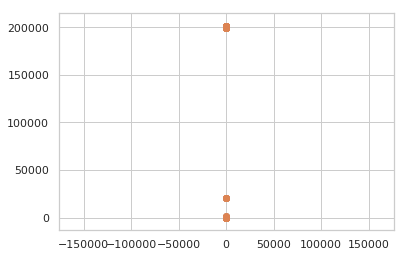

In [35]:
# -*- coding: utf-8 -*-
"""
Created on Wed Aug 07 08:28:00 2019

@author: Geoffrey Duncan Opiyo

AIM: To study and see the cumulative variance explained by all the principal components (variables)
so that we apply DIMENSIONALITY REDUCTION to select the most statistically significant matrix of feautres X
to participate in the model.
"""

# Importing the libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Importing the dataset
dataset = pd.read_csv('machine_learning_data_test_200.csv')
X = dataset.iloc[:, 0:10].values
y = dataset.iloc[:, 10].values

#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components= None)
pca.fit(X)
X_pca = pca.transform(X)
print('\n')
print("original shape (rows, columns):   ", X.shape)
print("transformed shape (rows, columns):", X_pca.shape)
print('\n')

#Evaluation
print('\nPCA Components')
print('***************\n')
print(pca.components_)

print('\nPCA Variance')
print('***************\n')
print(pca.explained_variance_)
print('\n')

print('Explained Variance Ratio')
print('************************\n')
print(pca.explained_variance_ratio_)
print('\n')

print(dataset.head(5))


#Visualizing inverse transformation
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');



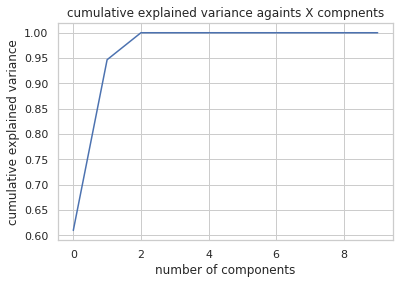

In [36]:
# Visualizing Cumulative variance ratio.
# and as seen, only two components are the most statistically
# significant matrix of feautres X attributing to over 51%

plt.title('cumulative explained variance againts X compnents')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [38]:
print(list(dataset.columns))

['NS_count', 'creation_date', 'registrar_opt', 'last_updated', 'expiration_date', 'domain_age', 'TLDstatus', 'TLDstringct', 'DNstringct', 'DNstringft', 'domain_type']


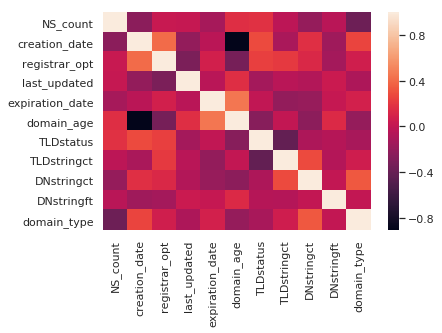

In [39]:
# chi-square test of independence

sns.heatmap(dataset.corr())
plt.show()

/home/hadoop/.conda/envs/my_data_analytic3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/hadoop/.conda/envs/my_data_analytic3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/hadoop/.conda/envs/my_data_analytic3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a sin

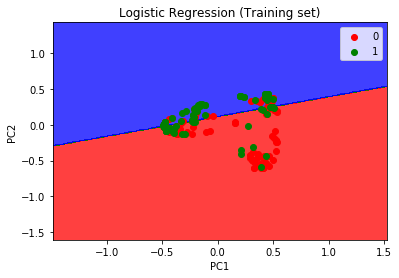

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<Figure size 432x288 with 0 Axes>

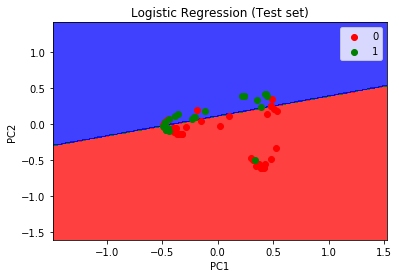

<Figure size 432x288 with 0 Axes>

In [1]:
###############################
# Logistic Regression         #
###############################
# -*- coding: utf-8 -*-
"""
Created on Wed Aug 07 09:50:00 2019

@author: Geoffrey Duncan Opiyo
"""

# Importing the libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

# Importing the dataset
dataset = pd.read_csv('machine_learning_data_test_200.csv')
X = dataset.iloc[:, 0:10].values
y = dataset.iloc[:, 10].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

'''
DIMENSIONALITY REDUCTION:

PCA
****
For this dataset, we need to perform dimensionality reduction to reduce the number of features from 9 to 2 as strongly supported 
by the cumulative explained variance ratio. These 2 new features give the directions in which there is maximal variance.
That will explain the data with most variance amounting to statistically significant variables/data points.
'''
#from sklearn.decomposition import PCA
#pca = PCA(n_components = 2)
#X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)
#explained_variance = pca.explained_variance_ratio_


# Applying Kernel PCA (Unsupervised Learning)

from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)


# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C = 10, random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix for evalution of 1. False Positive, 2. False Negative, 3. True Positive, 4. True Negative
from sklearn.metrics import confusion_matrix
confusionMax_LR = confusion_matrix(y_test, y_pred)

#Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = -1)

# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C':np.logspace(-3,3,7),'penalty':["l1","l2"]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_


# Visualising the Training set results
plt.figure(1)
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()
plt.savefig('LR_1.png')



# Visualising the Test set results
plt.figure(2)
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()
plt.savefig('LR_2.png')


In [2]:
# Best Accuracy score & best LR Parameters

print("\nGrid Search Best Accuracy Test Is:", best_accuracy)
print("\n")
print("\nBest Logistic Regression Parameters are:", best_parameters)
print("\n")


Grid Search Best Accuracy Test Is: 0.6634146341463415



Best Logistic Regression Parameters are: {'C': 1.0, 'penalty': 'l1'}




In [3]:
accuracies

array([0.76190476, 0.52380952, 0.66666667, 0.76190476, 0.61904762,
       0.57142857, 0.65      , 0.8       , 0.5       , 0.68421053])

In [4]:
#Calculating model accuracy
accuracies.mean()

0.6538972431077694

In [5]:
#Calculating Variance in the model
accuracies.std()

0.09715820082712985

In [6]:
# Model Evaluation metrics

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

#Classifier Confusion matrix

from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.6956521739130435
Precision Score : 0.6206896551724138
Recall Score : 0.6428571428571429
F1 Score : 0.6315789473684211
Confusion Matrix : 
[[30 11]
 [10 18]]


In [7]:
#Classification Report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74        41
           1       0.62      0.64      0.63        28

   micro avg       0.70      0.70      0.70        69
   macro avg       0.69      0.69      0.69        69
weighted avg       0.70      0.70      0.70        69



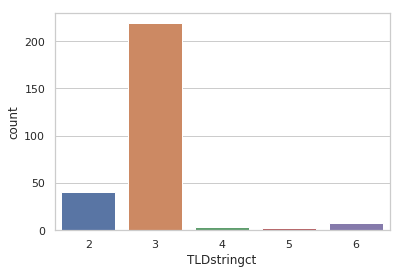

In [8]:
# -*- coding: utf-8 -*-
"""
Created on Wed Aug 07 08:51:00 2019

@author: Geoffrey Duncan Opiyo

Data Exploration
"""
#Importing the libraries
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

sns.countplot(x="TLDstringct", data=dataset)
plt.show()

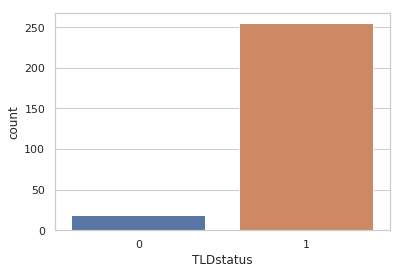

In [56]:
sns.countplot(x="TLDstatus", data=dataset)
plt.show()

In [9]:
# Write OUT prediction result to a CSV file pred_1.csv
pred = pd.DataFrame()
pred['Id'] = np.arange(X_test.shape[0])
pred['Prediction'] = np.zeros(X_test.shape[0],dtype = np.int)
pred.to_csv('pred_1.csv',index=False)
pred.tail(10)

,Id,Prediction
59,59,0
60,60,0
61,61,0
62,62,0
63,63,0
64,64,0
65,65,0
66,66,0
67,67,0
68,68,0


In [58]:
X_train

array([[ 1.00053795e+00, -8.16416266e-01],
       [-9.72383026e-01, -1.42122780e+00],
       [ 1.12202548e+00, -1.68615234e-01],
       [-1.72805359e+00,  6.05108071e-01],
       [-1.03163368e+00, -2.96373771e-01],
       [ 2.60321022e+00, -1.23007721e+00],
       [-1.44138451e+00,  5.90815602e-01],
       [ 1.30498846e+00, -1.54148379e+00],
       [ 2.11692255e+00,  7.11296790e-01],
       [ 1.45954523e+00, -8.84077857e-01],
       [-1.43913799e+00,  5.90819405e-01],
       [-1.42751256e+00, -1.67703785e-01],
       [ 6.50264573e-01, -2.55586626e+00],
       [ 1.02121978e+00, -6.48643791e-03],
       [-1.12843163e+00, -8.65011412e-02],
       [ 2.77209262e+00, -1.56252969e+00],
       [ 1.22446481e+00, -5.21689458e-01],
       [-1.49416480e+00,  4.03241130e-03],
       [-1.09383357e+00, -2.67841183e-01],
       [ 1.12284218e+00, -2.64087948e-01],
       [ 7.24434972e-01, -2.72826579e+00],
       [ 3.28176382e+00,  3.59158611e+00],
       [-1.27085714e+00,  1.61481710e-01],
       [-1.

In [59]:
X_test

array([[ 1.15590186e+00, -2.54482400e-01],
       [-1.34411530e+00,  3.33206721e-01],
       [-1.03154218e+00, -4.39584762e-01],
       [-1.12328131e+00, -1.81966518e-01],
       [ 9.53473522e-01,  1.65247906e-01],
       [-1.06095658e+00, -3.53710041e-01],
       [-1.20865502e+00, -1.02620210e-02],
       [ 2.69990399e+00, -1.18137738e+00],
       [-1.34308604e+00,  3.33208463e-01],
       [ 1.56116333e+00, -1.14167937e+00],
       [-9.69986326e-01, -1.09299974e+00],
       [-1.07066148e+00, -1.16362062e+00],
       [-9.92938234e-01, -4.29969827e-01],
       [ 1.25751873e+00, -5.12083920e-01],
       [-1.20754940e+00, -1.02601490e-02],
       [ 7.58305820e-01, -2.81413993e+00],
       [-2.24270129e+00,  1.89310456e+00],
       [-1.16258608e+00, -9.61085431e-02],
       [ 6.86131103e-01, -2.64241976e+00],
       [ 1.08856958e+00, -1.30484404e-01],
       [ 8.71883349e-01,  1.32041085e+00],
       [ 2.09870182e+00,  1.46980881e+00],
       [ 1.35914570e+00, -7.69685422e-01],
       [-1.

In [70]:
y_test

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0])

In [71]:
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0])